<a href="https://colab.research.google.com/github/hamednasr/tensorflow/blob/main/03_computer_vision_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# computer vision with TensorFlow


In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display
display.set_matplotlib_formats('svg')
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.metrics import confusion_matrix,classification_report
import scipy.stats as stats
from sklearn.preprocessing import Normalizer

In [9]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-02-24 11:21:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.1.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   239MB/s    in 0.4s    

2022-02-24 11:21:14 (239 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [10]:
!ls pizza_steak

test  train


In [11]:
!ls pizza_steak/test

pizza  steak


In [12]:
!ls pizza_steak/test/pizza

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

In [13]:
import os
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'in folder: {dirpath},\n number of folders: {len(dirnames)} \n number of files: {len(filenames)}')

in folder: pizza_steak,
 number of folders: 2 
 number of files: 0
in folder: pizza_steak/test,
 number of folders: 2 
 number of files: 0
in folder: pizza_steak/test/steak,
 number of folders: 0 
 number of files: 250
in folder: pizza_steak/test/pizza,
 number of folders: 0 
 number of files: 250
in folder: pizza_steak/train,
 number of folders: 2 
 number of files: 0
in folder: pizza_steak/train/steak,
 number of folders: 0 
 number of files: 750
in folder: pizza_steak/train/pizza,
 number of folders: 0 
 number of files: 750


In [14]:
import pathlib
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [15]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


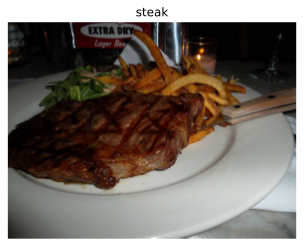

In [16]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [17]:
img.shape

(384, 512, 3)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen = ImageDataGenerator(rescale=.1)
val_datagen = ImageDataGenerator(rescale=.1)

In [20]:
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

In [21]:
train_data = train_datagen.flow_from_directory(directory=train_dir,target_size=(100,100),class_mode='binary',batch_size=32,seed=42)

Found 1500 images belonging to 2 classes.


In [22]:
test_data = val_datagen.flow_from_directory(directory=test_dir,target_size=(100,100),class_mode='binary',seed=42,batch_size=32)

Found 500 images belonging to 2 classes.


In [23]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(filters=10,
                                   kernel_size=3,
                                   activation='relu',
                                   input_shape=(100,100,3)),
            
            tf.keras.layers.Conv2D(10,3,activation='relu'),
            tf.keras.layers.MaxPool2D(),

            tf.keras.layers.Conv2D(10,3,activation='relu'),
            tf.keras.layers.Conv2D(10,3,activation='relu'),
            tf.keras.layers.MaxPool2D(),

            tf.keras.layers.Flatten(),

            tf.keras.layers.Dense(16,activation='relu'),
            tf.keras.layers.Dense(1,activation='sigmoid')
    ])

model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

model.fit(train_data,epochs=3)

Epoch 1/3
47/47 [==============================] - 18s 146ms/step - loss: 0.9000 - accuracy: 0.4947
Epoch 2/3
47/47 [==============================] - 6s 136ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/3
47/47 [==============================] - 6s 134ms/step - loss: 0.6932 - accuracy: 0.5000


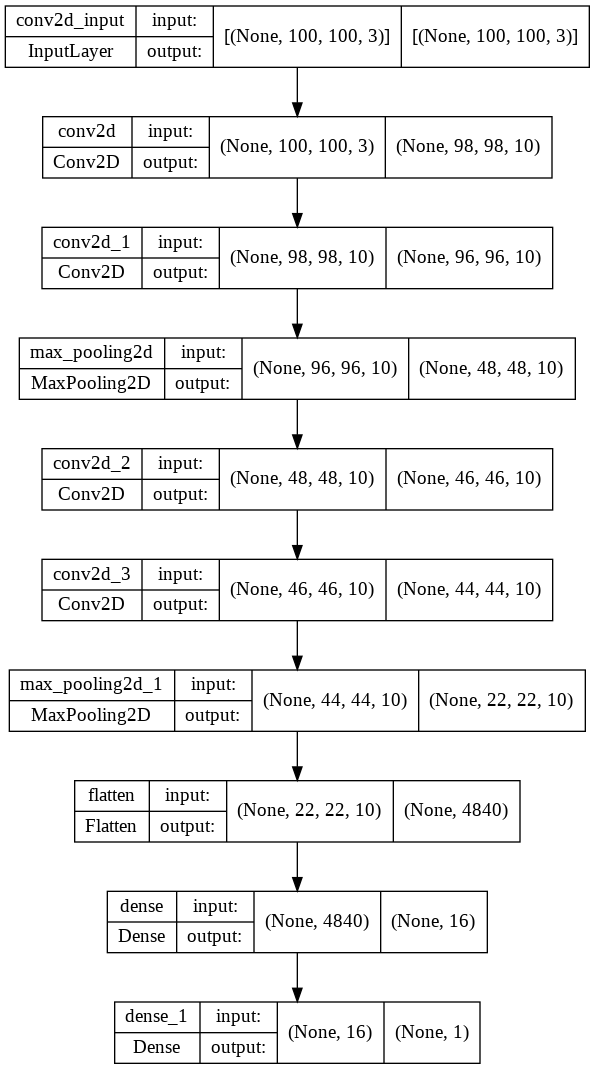

In [24]:
tf.keras.utils.plot_model(model,show_shapes=True)

## second model

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
train_datagen = ImageDataGenerator(rescale=1/255, rotation_range=30)
test_datagen = ImageDataGenerator(rescale=1/255, rotation_range=30)

In [27]:
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

In [28]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(256, 256),
                                               color_mode='rgb',                                               
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(256, 256),
                                               color_mode='rgb',                                               
                                               class_mode='binary',
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [29]:
train_data

In [30]:
images , labels = train_data.next()
print(images.shape)
print(labels.shape)

(32, 256, 256, 3)
(32,)


In [32]:
model2 = tf.keras.Sequential([
              tf.keras.layers.Conv2D(filters=10,
                                     kernel_size=3,
                                     padding='same',
                                     strides=2,
                                     activation='relu',
                                     input_shape=((256, 256,3))),
              # tf.keras.layers.MaxPool2D(),

              tf.keras.layers.Conv2D(filters=20,
                                     kernel_size=3,
                                     padding='same',
                                     strides=2,
                                     activation='relu'),
              # tf.keras.layers.MaxPool2D(),

              tf.keras.layers.Conv2D(filters=40,
                                     kernel_size=3,
                                     padding='same',
                                     strides=2,
                                     activation='relu'),
              # tf.keras.layers.MaxPool2D() ,          

              tf.keras.layers.Flatten(),

              tf.keras.layers.Dense(64,activation='relu',name='hamed'),
              tf.keras.layers.Dense(1,activation='sigmoid',name='output'),
])

model2.compile(loss =  tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

model2.build()
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 20)        1820      
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 40)        7240      
                                                                 
 flatten_1 (Flatten)         (None, 40960)             0         
                                                                 
 hamed (Dense)               (None, 64)                2621504   
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 2,630,909
Trainable params: 2,630,909
No

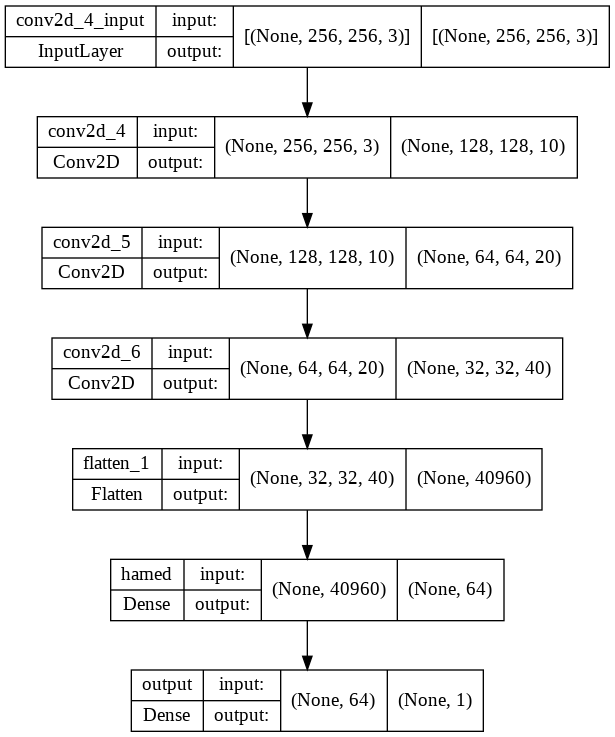

In [33]:
tf.keras.utils.plot_model(model2,show_shapes=True)

In [34]:
model2.fit(train_data,epochs=5,validation_data=test_data)

Epoch 1/5
47/47 [==============================] - 35s 737ms/step - loss: 0.6594 - accuracy: 0.6647 - val_loss: 0.4348 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 34s 722ms/step - loss: 0.4691 - accuracy: 0.7780 - val_loss: 0.3742 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 34s 726ms/step - loss: 0.4465 - accuracy: 0.7993 - val_loss: 0.4101 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 34s 725ms/step - loss: 0.4093 - accuracy: 0.8093 - val_loss: 0.3572 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 34s 728ms/step - loss: 0.3759 - accuracy: 0.8367 - val_loss: 0.3364 - val_accuracy: 0.8420
